<a href="https://colab.research.google.com/github/MrtGrd/LEO-satellite-MU-Massive-MIMO/blob/main/OFDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

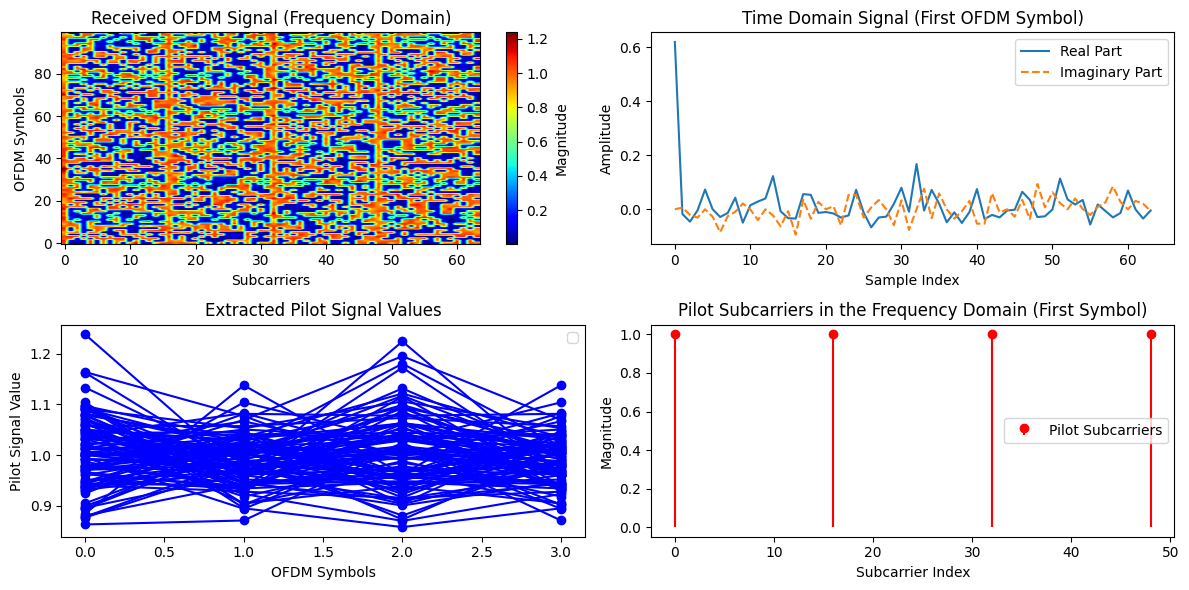

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_subcarriers = 64   # Total number of subcarriers
num_pilots = 4         # Number of pilot subcarriers
num_symbols = 100      # Number of OFDM symbols

# Generate random data (0, 1) for data subcarriers
data = np.random.randint(0, 2, (num_symbols, num_subcarriers - num_pilots))

# Generate pilot signals (e.g., alternating 1 and -1 for simplicity)
pilot = np.ones((num_symbols, num_pilots)) * 1  # All pilot subcarriers have the same value (1)

# Combine data and pilot into one OFDM symbol (with known pilot positions)
OFDM_symbols = np.zeros((num_symbols, num_subcarriers), dtype=complex)

# Assign pilot signals to specific subcarriers (for example, 0, 16, 32, 48)
pilot_positions = [0, 16, 32, 48]

for i in range(num_symbols):
    # Assign data to non-pilot subcarriers
    OFDM_symbols[i, list(set(range(num_subcarriers)) - set(pilot_positions))] = data[i]

    # Assign pilot signals
    OFDM_symbols[i, pilot_positions] = pilot[i]

# Perform IFFT (OFDM modulation)
time_domain_signal = np.fft.ifft(OFDM_symbols, axis=1)

# Add noise (simulating channel noise)
snr_db = 20  # Signal-to-noise ratio in dB
snr_linear = 10**(snr_db / 10)
noise_power = np.sum(np.abs(time_domain_signal)**2) / (num_subcarriers * num_symbols * snr_linear)
noise = np.sqrt(noise_power) * np.random.randn(*time_domain_signal.shape)

received_signal = time_domain_signal + noise

# Perform FFT (OFDM demodulation) on received signal
received_freq = np.fft.fft(received_signal, axis=1)

# Plot the results (pilot extraction)
plt.figure(figsize=(12, 6))

# Plot OFDM signal in frequency domain (before noise)
plt.subplot(2, 2, 1)
plt.imshow(np.abs(received_freq), aspect="auto", cmap="jet", origin="lower")
plt.title("Received OFDM Signal (Frequency Domain)")
plt.xlabel("Subcarriers")
plt.ylabel("OFDM Symbols")
plt.colorbar(label="Magnitude")

# Plot time-domain signal (only for the first OFDM symbol)
plt.subplot(2, 2, 2)
plt.plot(np.real(received_signal[0, :]), label="Real Part")
plt.plot(np.imag(received_signal[0, :]), label="Imaginary Part", linestyle="--")
plt.title("Time Domain Signal (First OFDM Symbol)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

# Plot the extracted pilot values over time (across OFDM symbols)
plt.subplot(2, 2, 3)
plt.plot(np.real(received_freq[:, pilot_positions]).T, marker='o', color='b')
plt.title("Extracted Pilot Signal Values")
plt.xlabel("OFDM Symbols")
plt.ylabel("Pilot Signal Value")
plt.legend()

# Plot the pilot symbols in the frequency domain (for the first OFDM symbol)
plt.subplot(2, 2, 4)
plt.stem(pilot_positions, np.ones(len(pilot_positions)), basefmt=" ", linefmt="r-", markerfmt="ro", label="Pilot Subcarriers")
plt.title("Pilot Subcarriers in the Frequency Domain (First Symbol)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


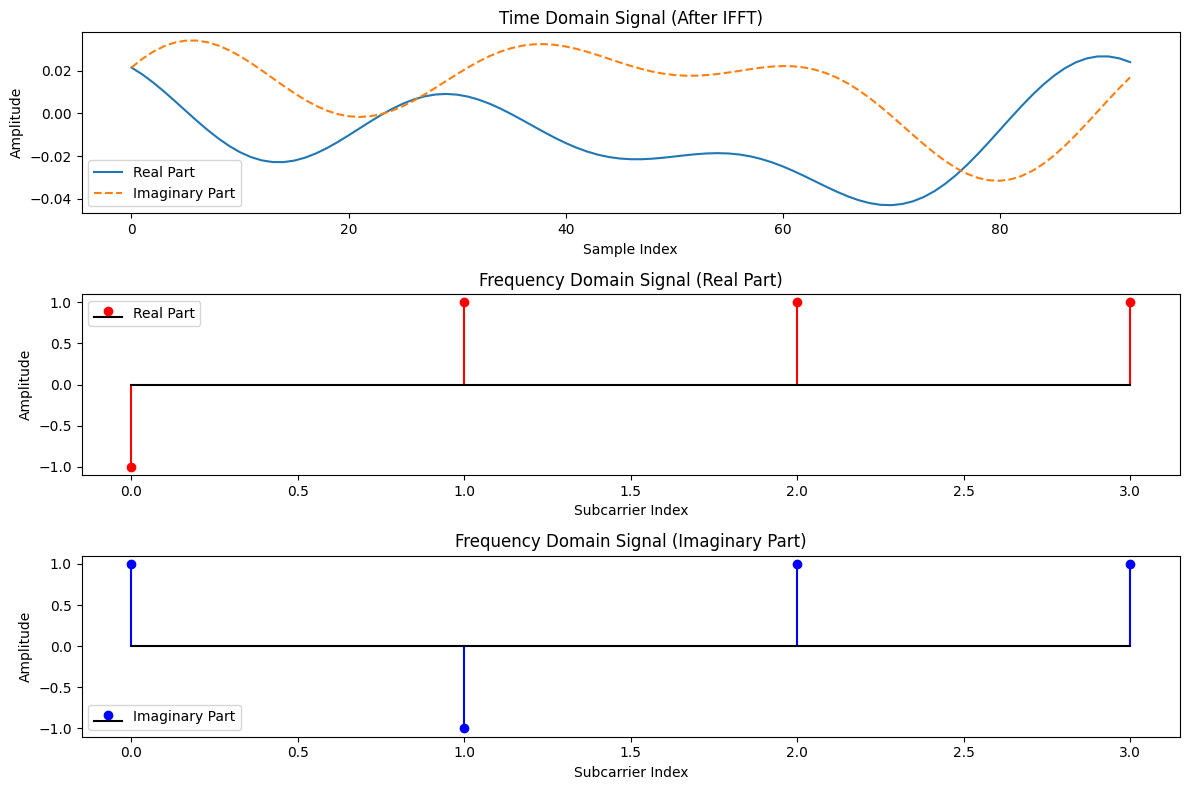

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
baseband_bandwidth = 1.4e6
subcarrier_spacing = 15e3
num_subcarriers = int(baseband_bandwidth / subcarrier_spacing)  # Number of subcarriers
num_symbols = 4  # Number of QPSK symbols to transmit (can increase if needed)

# QPSK modulation: 2 bits per symbol
# Generate random bits for QPSK symbols
np.random.seed(0)
bits = np.random.randint(0, 2, num_symbols * 2)  # Each subcarrier carries 2 bits (for QPSK)

# Map bits to QPSK symbols (mapping 00 -> 1+j, 01 -> -1+j, 10 -> -1-j, 11 -> 1-j)
qpsk_symbols = (2 * bits[::2] - 1) + 1j * (2 * bits[1::2] - 1)

# Create the frequency-domain signal by mapping QPSK symbols to subcarriers
ofdm_symbols = np.zeros(num_subcarriers, dtype=complex)
ofdm_symbols[:num_symbols] = qpsk_symbols  # Place QPSK symbols on subcarriers

# Apply IFFT to get the time-domain signal
time_domain_signal = np.fft.ifft(ofdm_symbols)

# Plot the time-domain signal (after IFFT)
plt.figure(figsize=(12, 8))

# First plot: Real and Imaginary parts with different styles
plt.subplot(3, 1, 1)
plt.plot(np.real(time_domain_signal), label="Real Part", linestyle='-')  # Solid line for Real part
plt.plot(np.imag(time_domain_signal), label="Imaginary Part", linestyle='--')  # Dotted line for Imaginary part
plt.title("Time Domain Signal (After IFFT)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

# Second plot: Real part of frequency-domain signal (before IFFT)
plt.subplot(3, 1, 2)
plt.stem(subcarrier_indices[:num_symbols], np.real(ofdm_symbols[:num_symbols]),
         markerfmt='ro', linefmt='r-', basefmt='k-', label="Real Part")
plt.title("Frequency Domain Signal (Real Part)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude")
plt.legend()

# Third plot: Imaginary part of frequency-domain signal (before IFFT)
plt.subplot(3, 1, 3)
plt.stem(subcarrier_indices[:num_symbols], np.imag(ofdm_symbols[:num_symbols]),
         markerfmt='bo', linefmt='b-', basefmt='k-', label="Imaginary Part")
plt.title("Frequency Domain Signal (Imaginary Part)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude")
plt.legend()

# Show all plots
plt.tight_layout()
plt.show()

Bit Error Rate (BER): 0.0


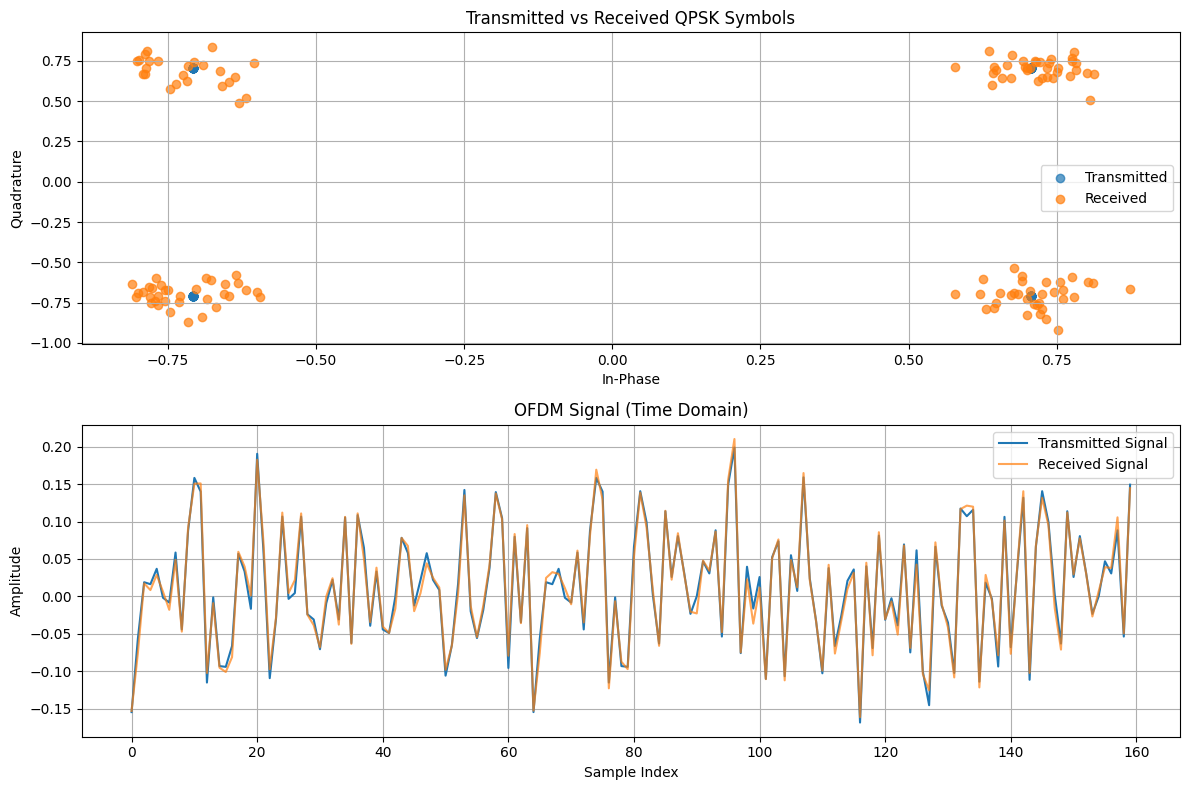

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 64  # Number of subcarriers
CP = 16  # Cyclic Prefix length
num_symbols = 2  # Number of OFDM symbols (set to 2 for better waveform resolution)
snr_db = 20  # Signal-to-Noise Ratio in dB

# Generate random data (QPSK symbols)
def qpsk_modulation(bits):
    symbols = (1 - 2 * bits[0::2]) + 1j * (1 - 2 * bits[1::2])
    return symbols / np.sqrt(2)  # Normalize power

bits = np.random.randint(0, 2, N * 2 * num_symbols)  # Random bits
qpsk_symbols = qpsk_modulation(bits)

# OFDM Modulation
ofdm_symbols = []
for i in range(num_symbols):
    # Take N QPSK symbols
    symbol = qpsk_symbols[i * N:(i + 1) * N]
    # Perform IFFT
    time_domain = np.fft.ifft(symbol, n=N)
    # Add Cyclic Prefix
    ofdm_with_cp = np.hstack([time_domain[-CP:], time_domain])
    ofdm_symbols.append(ofdm_with_cp)

# Convert to time domain signal
tx_signal = np.hstack(ofdm_symbols)

# Add noise (AWGN)
signal_power = np.mean(np.abs(tx_signal)**2)
snr_linear = 10**(snr_db / 10)
noise_power = signal_power / snr_linear
noise = np.sqrt(noise_power / 2) * (np.random.randn(len(tx_signal)) + 1j * np.random.randn(len(tx_signal)))
rx_signal = tx_signal + noise

# OFDM Demodulation
received_symbols = []
for i in range(num_symbols):
    # Extract OFDM symbol with CP
    ofdm_with_cp = rx_signal[i * (N + CP):(i + 1) * (N + CP)]
    # Remove CP
    ofdm_symbol = ofdm_with_cp[CP:]
    # Perform FFT
    freq_domain = np.fft.fft(ofdm_symbol, n=N)
    received_symbols.append(freq_domain)

# Convert to frequency domain symbols
received_symbols = np.hstack(received_symbols)

# Demodulation (QPSK)
def qpsk_demodulation(symbols):
    bits = np.zeros(2 * len(symbols), dtype=int)
    bits[0::2] = symbols.real < 0
    bits[1::2] = symbols.imag < 0
    return bits

received_bits = qpsk_demodulation(received_symbols)

# BER Calculation
bit_errors = np.sum(bits != received_bits)
ber = bit_errors / len(bits)
print(f"Bit Error Rate (BER): {ber}")

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("Transmitted vs Received QPSK Symbols")
plt.scatter(qpsk_symbols.real, qpsk_symbols.imag, label="Transmitted", alpha=0.7)
plt.scatter(received_symbols.real, received_symbols.imag, label="Received", alpha=0.7)
plt.xlabel("In-Phase")
plt.ylabel("Quadrature")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.title("OFDM Signal (Time Domain)")
plt.plot(np.real(tx_signal), label="Transmitted Signal")
plt.plot(np.real(rx_signal), label="Received Signal", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


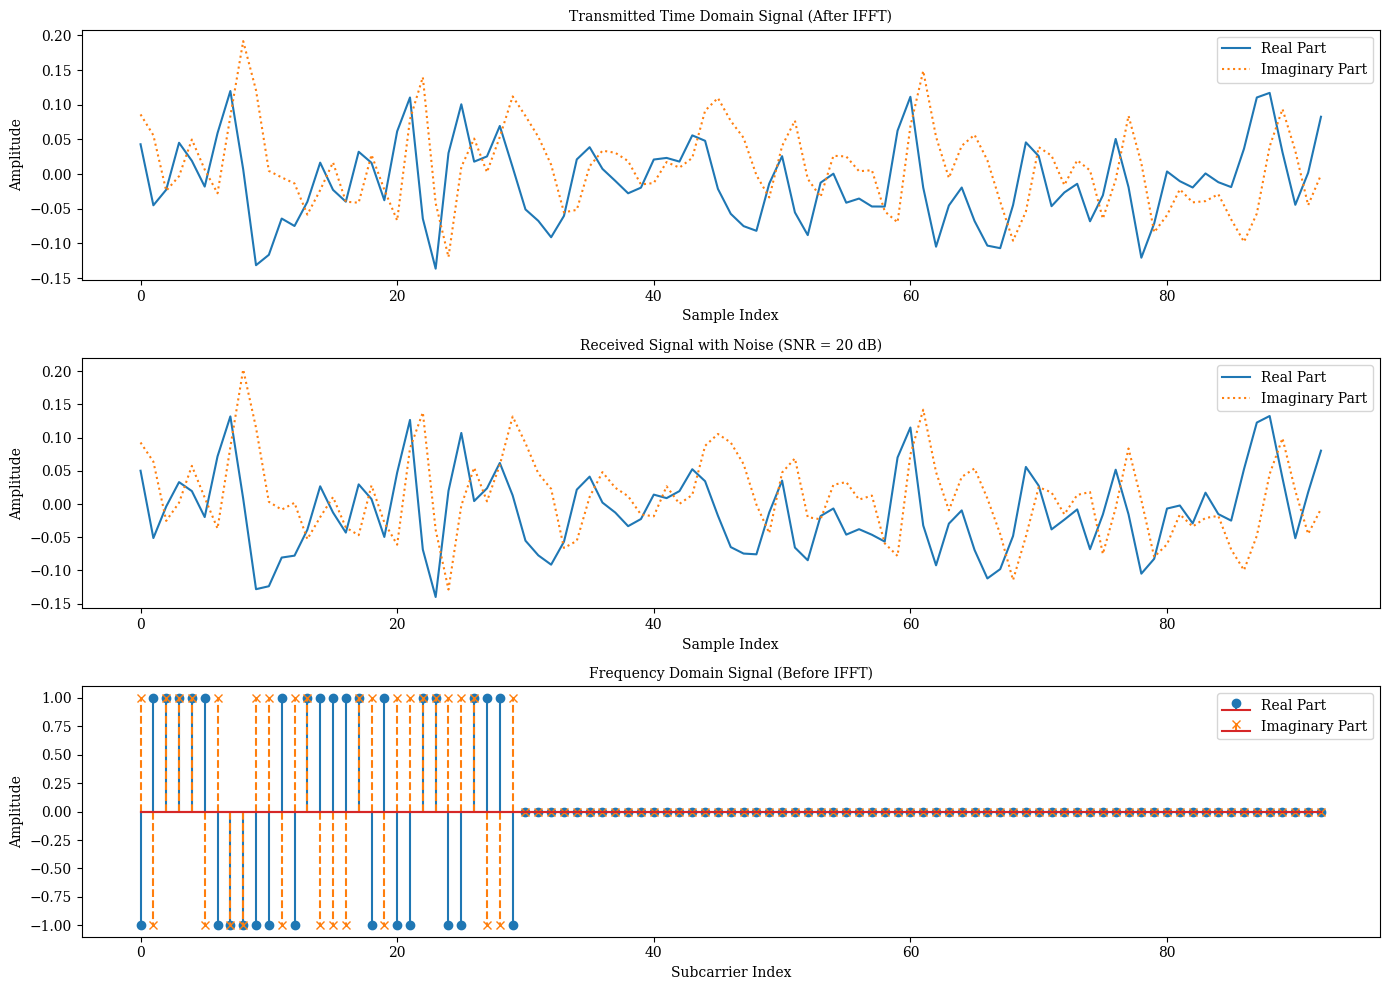

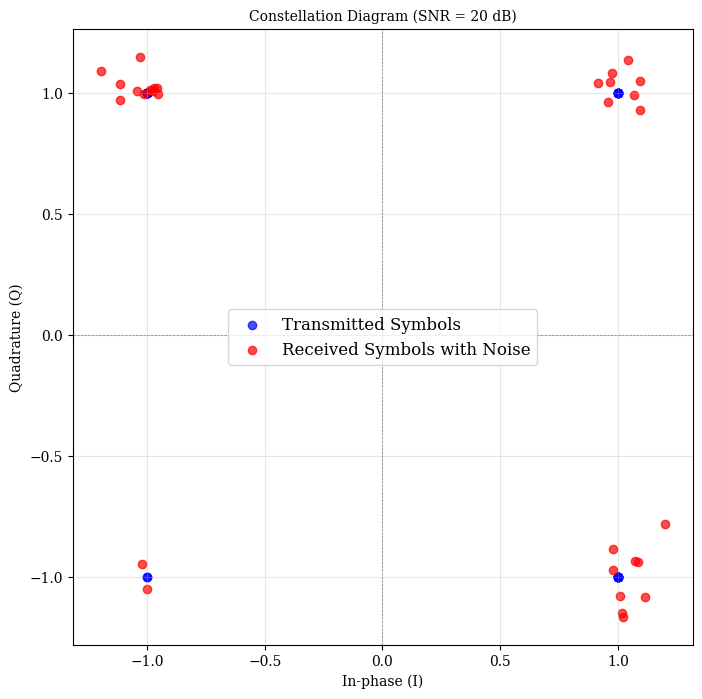

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
baseband_bandwidth = 1.4e6  # Hz
subcarrier_spacing = 15e3  # Hz
num_subcarriers = int(baseband_bandwidth / subcarrier_spacing)  # Number of subcarriers
num_symbols = 8  # Number of QPSK symbols to transmit
snr_db = 20  # Desired SNR in dB

# Generate random bits for QPSK symbols
np.random.seed(0)
bits = np.random.randint(0, 2, num_symbols * 2)  # Each symbol carries 2 bits (QPSK)

# Map bits to QPSK symbols (mapping: 00 -> 1+j, 01 -> -1+j, 10 -> -1-j, 11 -> 1-j)
qpsk_symbols = (2 * bits[::2] - 1) + 1j * (2 * bits[1::2] - 1)

# Frequency-domain signal: Map QPSK symbols to subcarriers
ofdm_symbols = np.zeros(num_subcarriers, dtype=complex)
ofdm_symbols[:num_symbols] = qpsk_symbols  # Place QPSK symbols on the first subcarriers

# Apply IFFT to get time-domain signal
time_domain_signal = np.fft.ifft(ofdm_symbols)

# Calculate signal power
signal_power = np.mean(np.abs(time_domain_signal) ** 2)

# Calculate noise power based on SNR
noise_power = signal_power / (10 ** (snr_db / 10))
noise_std = np.sqrt(noise_power)

# Generate AWGN noise
noise = np.random.normal(0, noise_std, len(time_domain_signal)) + \
        1j * np.random.normal(0, noise_std, len(time_domain_signal))

# Add noise to the signal
received_signal = time_domain_signal + noise

# Transform the received signal back to the frequency domain
received_ofdm_symbols = np.fft.fft(received_signal)

# Extract the received QPSK symbols
received_qpsk_symbols = received_ofdm_symbols[:num_symbols]

# Plot the time-domain signal
plt.figure(figsize=(14, 10))

# Plot the original transmitted signal
plt.subplot(3, 1, 1)
plt.plot(np.real(time_domain_signal), label="Real Part")
plt.plot(np.imag(time_domain_signal), label="Imaginary Part", linestyle='dotted')
plt.title("Transmitted Time Domain Signal (After IFFT)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

# Plot the received signal (with noise)
plt.subplot(3, 1, 2)
plt.plot(np.real(received_signal), label="Real Part")
plt.plot(np.imag(received_signal), label="Imaginary Part", linestyle='dotted')
plt.title(f"Received Signal with Noise (SNR = {snr_db} dB)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

# Plot the frequency-domain signal (real and imaginary parts separately)
plt.subplot(3, 1, 3)
plt.stem(np.real(ofdm_symbols), label="Real Part", markerfmt='o', linefmt='C0-')
plt.stem(np.imag(ofdm_symbols), label="Imaginary Part", markerfmt='x', linefmt='C1--')
plt.title("Frequency Domain Signal (Before IFFT)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

# Constellation plot
plt.figure(figsize=(8, 8))
plt.scatter(np.real(qpsk_symbols), np.imag(qpsk_symbols), color='blue', label="Transmitted Symbols", alpha=0.7)
plt.scatter(np.real(received_qpsk_symbols), np.imag(received_qpsk_symbols),
            color='red', label="Received Symbols with Noise", alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.title(f"Constellation Diagram (SNR = {snr_db} dB)")
plt.xlabel("In-phase (I)")
plt.ylabel("Quadrature (Q)")
plt.legend()
plt.show()
